# Du NLP en Français 

Nous avons fait du NLP avec des datasets classiques et bien connus mais qu'en est il sur des dataset en français ? Voyons cela dans cet exercice

1. Importez les librairies nécessaires à la gestion de texte dans FastAi.

In [0]:
from fastai.text import*
import pandas as pd

2. Importez le dataset *facebook_reviews_disneylandParis_format.csv*

In [0]:
df=pd.read_csv("facebook_reviews_disneylandParis_format.csv")

In [25]:
df.head(1)

,user_id,review,stars,date_format,time_of_day,hour_of_day,day_of_week,review_format,review_lang,month_year,review_len,review_nb_words
0,efb62a167fee5cf3678b24427de8e31f,"Génial, fabuleux, exceptionnel ! J'aimerais qu...",5,2017-09-29 18:17:00,18:17,18,Ven,génial fabuleux exceptionnel j aimerais qu...,french,2017-09,115,19


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299635 entries, 0 to 299634
Data columns (total 12 columns):
user_id            299635 non-null object
review             16413 non-null object
stars              299635 non-null int64
date_format        299635 non-null object
time_of_day        299635 non-null object
hour_of_day        299635 non-null int64
day_of_week        299635 non-null object
review_format      16408 non-null object
review_lang        16268 non-null object
month_year         299635 non-null object
review_len         299635 non-null int64
review_nb_words    299635 non-null int64
dtypes: int64(4), object(8)
memory usage: 27.4+ MB


3. Dans le dataset, ne gardez uniquement les reviews laissées en français 

In [27]:
df["review_lang"].value_counts()

french                 8474
english                2394
spanish                 966
italian                 782
german                  533
dutch                   397
portuguese              389
scots                   302
latin                   288
romanian                200
rumantsch               173
afrikaans               136
frisian                 127
middle_frisian          105
polish                   86
estonian                 77
esperanto                73
catalan                  63
manx                     58
slovak-windows1250       49
tagalog                  44
danish                   44
breton                   39
slovenian-iso8859_2      39
swedish                  35
finnish                  31
hungarian                30
norwegian                23
turkish                  22
czech-iso8859_2          22
greek-iso8859-7          22
slovenian-ascii          21
lithuanian               19
slovak-ascii             18
malay                    18
russian-koi8_r      

,user_id,review,stars,date_format,time_of_day,hour_of_day,day_of_week,review_format,review_lang,month_year,review_len,review_nb_words
0,efb62a167fee5cf3678b24427de8e31f,"Génial, fabuleux, exceptionnel ! J'aimerais qu...",5,2017-09-29 18:17:00,18:17,18,Ven,génial fabuleux exceptionnel j aimerais qu...,french,2017-09,115,19
2,1b8e5760162d867e9b9ca80f645bdc60,"Toujours aussi magic, féerique !",5,2017-09-29 16:46:00,16:46,16,Ven,toujours aussi magic féerique,french,2017-09,32,4
11,726b1a3e2664e8b075129bcd643dbf56,En vacances en région parisienne nous nous som...,2,2017-09-29 00:37:00,00:37,0,Ven,en vacances en région parisienne nous nous som...,french,2017-09,172,25
12,8a71763fbb3da7436b957681b24cc404,Tropbeaufinalpleinlesyeuxoreil,5,2017-09-29 00:16:00,00:16,0,Ven,tropbeaufinalpleinlesyeuxoreil,french,2017-09,30,1
23,ce7abd7798ee036d667c0ad84b85daa7,L'univers Disney reste merveilleux. Toutefois ...,4,2017-09-28 20:24:00,20:24,20,Jeu,l univers disney reste merveilleux toutefois ...,french,2017-09,148,23


In [0]:
df = df[df.review_lang == "french"]

4. Nous n'avons besoin que des colonnes *review_format* et *stars*. Adaptez donc le dataset en fonction.

In [0]:
df=df[["review_format", "stars"]]

,review_format,stars
0,génial fabuleux exceptionnel j aimerais qu...,5
2,toujours aussi magic féerique,5
11,en vacances en région parisienne nous nous som...,2
12,tropbeaufinalpleinlesyeuxoreil,5
23,l univers disney reste merveilleux toutefois ...,4


5. Séparez votre dataset en un training set et un test set

In [0]:
X=df
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size = 0.2, random_state=42)

6. Créez maintenant un DataBunch adapté. Faites attention cependant, vous devrez utiliser un Tokenizer différent de celui par défaut. 

[Regardez la documentation en détail ](https://docs.fast.ai/text.transform.html#Tokenizer)

7. Regarder un batch de données préprocessées

idx,text
0,santafé nous avons passé un excellent moment l univers disney est très bien mis en scène très xxunk les spectacles nous mettent des etoiles pleins les yeux nous sommes venu en période de faible affluence minutes de queue pour les attractions les plus prisées je ne veux même pas imaginer l attente les jours de forte affluence quelques petits bémols par contre pirate des caraïbes ratatouille et le manoir hantée
1,le coup d oeil on en reste bouche bée disney met le paquet c est magnifique quand aux temps d attente plus que raisonnable en pleine saison puisque en moyenne c etait min xxbos l accueil réservé aux personnes handicapées est sérieusement à revoir mon ami non voyant est xxunk pouvoir obtenir une carte prioritaire pour les manèges nous avons fais queues en h pour ne rien obtenir d autre
2,prix du parking à alors que pas éclairé quand on doit repartir et pas sécurisé par contre rien a dire sur la parade et sur le disney illumination juste magnifique xxbos malgré le temps j y ai passé une bonne journée de bonnes attractions de jolis décors du personnel très agréable par contre pour la restauration la prochaine fois j xxunk mon xxunk pique nique j ai testé les hot
3,ai que un par parc surtout au grand parc car il faut tout traverser si on est à l opposé et c est vraiment agréable ce petit coin pour les bébés très propre et très bien xxunk quand à l hôtel nous avons été au ranch davy crocket juste superbe comme endroit xxbos visite du et août notamment le vendredi août où tout d abord nous devions déposer nos bagages
4,chers mais c est disney il vaut mieux prendre son sandwich et s offrir une douceur la bas xxbos séjour du août extrêmement déçu xxbos nous nous sommes rendus au parc dimanche dernier et les deux jours xxunk le parc était complètement saturé c est de loin pas notre première fois sur le site mais quel stress et quelle attente il serait bien de limiter les places à un nombre


# Predict next words

7. Créeons un language model learner qui va essayer de faire des prédictions de phrases à partir de mots que vous entrerez en input

8. Entrainez le modèle sur 3 epochs 

epoch,train_loss,valid_loss,accuracy,time
0,6.916481,6.115502,0.031224,20:45
1,6.351609,6.104416,0.031224,20:39
2,6.225016,6.097180,0.031224,20:42


9. Tentez de faire une prédiction des 10 prochains mots de la phrase : `J'aime disneyland parce que `

"J'aime disneyland parce que fait arrivé tiers de faire séjour afin etc parc endroit"

9b. Les résultats ne sont pas très concluants. Vous pouvez tenter d'entrainer le modèle sur plus d'epoch et vous rapprocher d'un résultat plus correct. Cependant, cela est très couteux en termes de temps. N'hésitez donc pas à sauter cette question si votre entrainement prend trop de temps. 

epoch,train_loss,valid_loss,accuracy,time
0,6.205781,6.090012,0.031278,19:14
1,6.136945,6.004548,0.039844,19:09


# Text classifier

10. On va essayer de faire une prédiction maintenant de la note qu'une personne a laissée en fonction de la reviews qu'elle a écrite. Créez donc un nouveau DataBunch adapté à cette problématique 

11. Créez un modèle adapté 

12. Entrainez votre modèle sur 3 epochs 

epoch,train_loss,valid_loss,accuracy,time
0,1.434594,1.217754,0.579130,09:44
1,1.257058,1.257705,0.579130,09:19
2,1.236268,1.220169,0.579130,09:30


13. On va tenter de faire mieux. Entrainez votre modèle en effectuant du fine-tuning sur le learning rate 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07


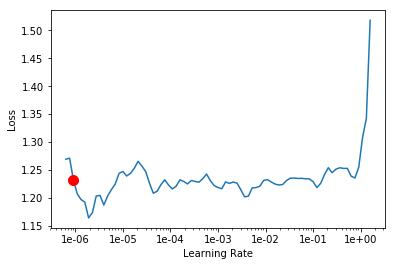

epoch,train_loss,valid_loss,accuracy,time
0,1.199046,1.220829,0.579130,25:19
1,1.205989,1.222547,0.579130,24:23
2,1.234790,1.213169,0.579130,29:30
3,1.212960,1.222596,0.579130,30:17


epoch,train_loss,valid_loss,accuracy,time
0,1.183075,1.064730,0.620870,23:39
1,1.016155,0.926652,0.629565,27:53
2,0.973495,0.905702,0.641739,26:31


14. Puisque nous sommes sur de la classification, tentons de voir ce que nous propose l'interpréteur : ```ClassificationInterpretation```

15. Regardez la matrice de confusion pour voir où votre modèle s'est trompé 

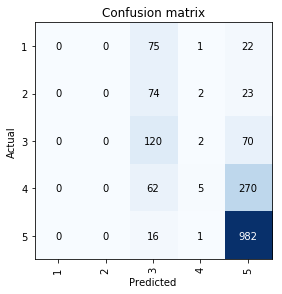

16. Nous allons voir un autre interpréteur. Testez : ```TextClassificationInterpretation```

17. Utilisez la méthode ```show_top_losses``` pour voir quelles sont les prédictions où le modèle s'est le plus trompé 

Text,Prediction,Actual,Loss,Probability
xxbos aujourd hui j ai xxunk moi qui adore le parc qui est ma ème maison plein attractions de ferme pour le prix que l on payé c est honteux stars tour le train de la mine space montaine et j en passe,5,1,4.24,0.01
xxbos première xxunk a disney pour moi et ma petite famille la semaine dernière c était juste génial,5,5,3.90,0.86
xxbos payer aussi cher pour trouver beaucoup d attractions fermés ça s appelle du vol nous étions alors xxunk pour combien nous en avons eux,5,2,3.72,0.02


18. Nous allons utiliser une autre méthode qui est : ```show_intrinsic_attention```. Insérez en input la première review de votre dataset et regardez le résultat. 

Que pouvez-vous dire ?

19. Tentez avec quelques autres reviews pour voir ce que propose votre modèle 